# Free Particle(Gaussian wavefunction) diffusion under time evolution

### Preliminaries

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
# from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram, plot_distribution


[3.21647099e-28 1.59740497e-26 6.99422507e-25 2.69993530e-23
 9.18874694e-22 2.75707390e-20 7.29339446e-19 1.70098381e-17
 3.49751703e-16 6.34028350e-15 1.01332019e-13 1.42782144e-12
 1.77374130e-11 1.94265572e-10 1.87581751e-09 1.59688819e-08
 1.19852643e-07 7.93067042e-07 4.62659377e-06 2.37958935e-05
 1.07902584e-04 4.31370911e-04 1.52040415e-03 4.72450615e-03
 1.29432390e-02 3.12621401e-02 6.65707760e-02 1.24979193e-01
 2.06862130e-01 3.01865478e-01 3.88360531e-01 4.40499993e-01
 4.40499993e-01 3.88360531e-01 3.01865478e-01 2.06862130e-01
 1.24979193e-01 6.65707760e-02 3.12621401e-02 1.29432390e-02
 4.72450615e-03 1.52040415e-03 4.31370911e-04 1.07902584e-04
 2.37958935e-05 4.62659377e-06 7.93067042e-07 1.19852643e-07
 1.59688819e-08 1.87581751e-09 1.94265572e-10 1.77374130e-11
 1.42782144e-12 1.01332019e-13 6.34028350e-15 3.49751703e-16
 1.70098381e-17 7.29339446e-19 2.75707390e-20 9.18874694e-22
 2.69993530e-23 6.99422507e-25 1.59740497e-26 3.21647099e-28]


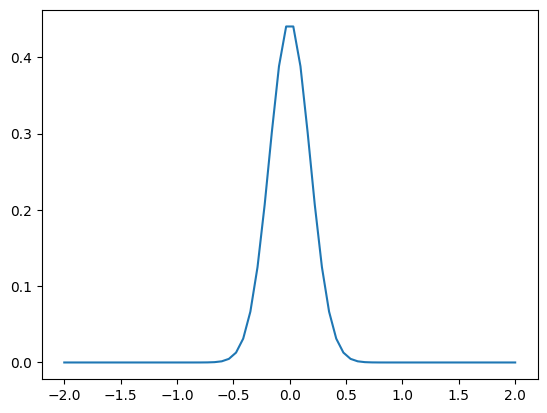

In [2]:
#Preparing the Gaussian-shaped histogram that will be used in the initialisation

x = np.linspace(-2,2, num=64)
storage_for_normalisation = []

Normalisation_wavefunction = (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*x**2)/(2*0.016)))

Normalisation_Constant = np.sqrt(np.sum(np.abs(Normalisation_wavefunction**2)))

waveFunction = (Normalisation_wavefunction)/(Normalisation_Constant)

print(waveFunction)
plt.plot(x,waveFunction)
plt.show()

In [8]:
#Initialisation


def QFT(qubits):
    qc.swap(1,6)
    qc.swap(2,5)
    qc.swap(3,4)
    for i in range(qubits):
        #qc.barrier()
        qc.h(i+1)
        for j in range(qubits - 1 - i):
            qc.cp(pi/(2**(j+1)), i+2+j, i+1)




def Time_Evolution(qubits):
    for i in range (qubits):
        qc.p(phi/(2**(i+qubits-3)), qubits-i)
    for i in range (qubits):
        for j in range (i+1,qubits):
            qc.cx(qubits-j, 0)
            qc.cx(qubits-i, 0)
            qc.p(phi* (2**(2-i-j)), 0) #2-i-j or 4?
            qc.cx(qubits-i, 0)
            qc.cx(qubits-j, 0)




def QFT_Inv(qubits):
    for i in reversed(range(qubits)):
        for j in reversed(range(qubits - 1 - i)):
            qc.cp(-pi/(2**(j+1)), i+2+j, i+1)
        qc.h(i+1)
        #qc.barrier()
    qc.swap(1,6)
    qc.swap(2,5)
    qc.swap(3,4)

In [4]:
#n = 6 #number of qubits not including ancilla
phi = 0.3

qb = 6

q = QuantumRegister(qb + 1)
c = ClassicalRegister(6)
qc = QuantumCircuit(q)

qc2 = QuantumCircuit(q,c)


In [5]:
# Initialization

qc2.initialize(waveFunction, [q[1],q[2],q[3],q[4],q[5],q[6]])
# qc2.draw('mpl')

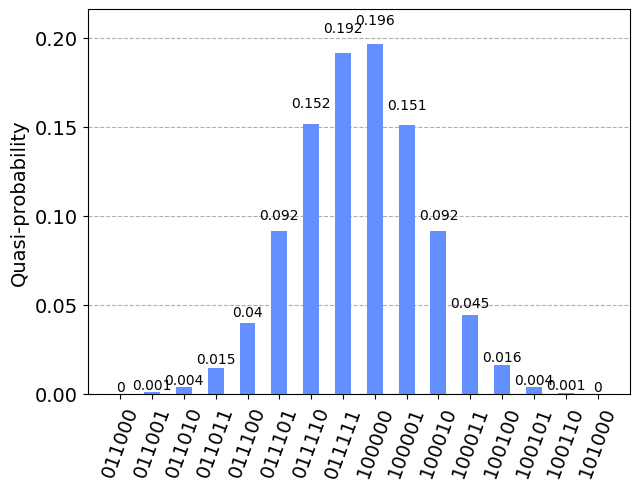

In [6]:
initial_qc=qc2.copy()
initial_qc.measure([i+1 for i in range(6)],[i for i in range(6)])
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(initial_qc, backend=backend,shots=10000).result().get_counts()
plot_distribution(counts)

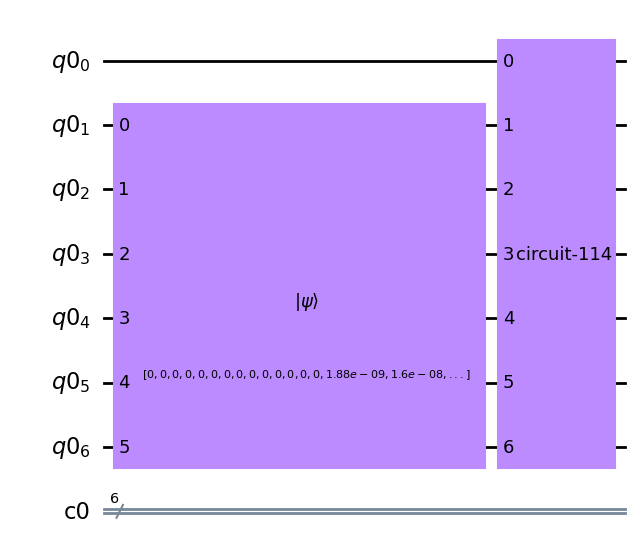

In [9]:
# Time evolution operator
QFT(qb)
qc.x(qb)
Time_Evolution(qb)
qc.x(qb)
QFT_Inv(qb)
qc2.append(qc, [0,1,2,3,4,5,6])
qc2.draw('mpl')

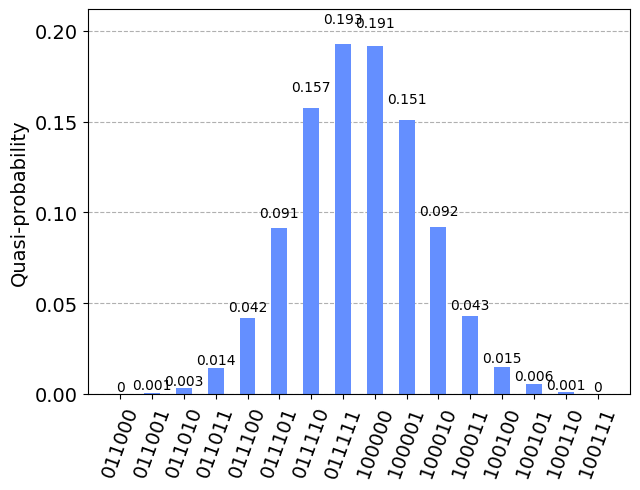

In [10]:
evolv_1=qc2.copy()
evolv_1.measure([i+1 for i in range(6)],[i for i in range(6)])
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(evolv_1, backend=backend,shots=10000).result().get_counts()
plot_distribution(counts)

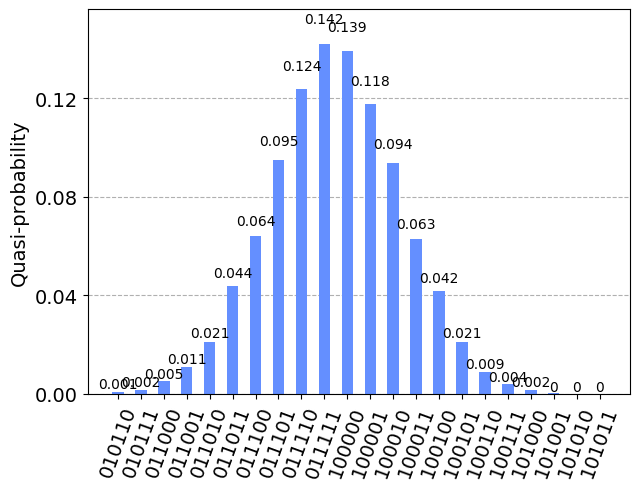

In [11]:
# Evolve \del t*8
for i in range(32):
    qc2.append(qc, [0,1,2,3,4,5,6])
evolv_8=qc2.copy()
evolv_8.measure([i+1 for i in range(6)],[i for i in range(6)])
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(evolv_8, backend=backend,shots=10000).result().get_counts()
plot_distribution(counts)

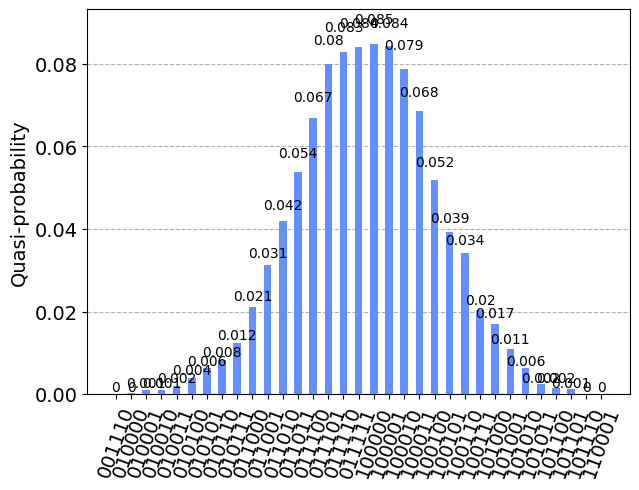

In [12]:
# Evolve \del t*16
for i in range(32):
    qc2.append(qc, [0,1,2,3,4,5,6])
evolv_16=qc2.copy()
evolv_16.measure([i+1 for i in range(6)],[i for i in range(6)])
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(evolv_16, backend=backend,shots=10000).result().get_counts()
plot_distribution(counts,)